In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
def process_gait_data(file_path):
    scaler = MinMaxScaler()

    df = pd.read_csv(file_path)
    

    if 'Time (s)' in df.columns:
        df.drop(columns=['Time (s)'], inplace=True)
        

    df = df.ffill().bfill() 
    df.replace([np.inf, -np.inf], np.nan, inplace=True)  
    df.dropna(inplace=True) 
    

    data_scaled = scaler.fit_transform(df)
    

    min_val, max_val = np.min(data_scaled), np.max(data_scaled)
    print("Min value:", min_val, "Max value:", max_val)
    

    df_scaled = pd.DataFrame(data_scaled, columns=df.columns)
    return df_scaled, scaler

In [3]:

stance_LA = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Left Stance/LA.csv'
stance_LH = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Left Stance/LH.csv'
stance_LK = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Left Stance/LK.csv'
swing_LA = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Left Swing/LA.csv'
swing_LH = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Left Swing/LH.csv'
swing_LK = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Left Swing/LK.csv'
scaled_stance_LA, scaler_stance_LA = process_gait_data(stance_LA)
scaled_stance_LH, scaler_stance_LH = process_gait_data(stance_LH)
scaled_stance_LK, scaler_stance_LK = process_gait_data(stance_LK)
scaled_swing_LA, scaler_swing_LA = process_gait_data(swing_LA)
scaled_swing_LH, scaler_swing_LH = process_gait_data(swing_LH)
scaled_swing_LK, scaler_swing_LK = process_gait_data(swing_LK)
print(scaled_stance_LA.head())

Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0000000000000002
   X (m/s^2)  Y (m/s^2)  Z (m/s^2)     Theta
0       0.24   0.333333   0.791666  0.225504
1       0.32   0.333333   0.846154  0.166310
2       0.32   0.333333   0.897436  0.110782
3       0.36   0.291667   0.897436  0.111608
4       0.36   0.291667   0.846154  0.167962


In [4]:

def create_sequences(data, seq_length):
    sequences = []
    data = np.array(data) 
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((seq, target))
    return sequences


seq_length = 10
sequences_ST_LA = create_sequences(scaled_stance_LA, seq_length)
sequences_ST_LH = create_sequences(scaled_stance_LH, seq_length)
sequences_ST_LK = create_sequences(scaled_stance_LK, seq_length)
sequences_SW_LA = create_sequences(scaled_swing_LA, seq_length)
sequences_SW_LH = create_sequences(scaled_swing_LH, seq_length)
sequences_SW_LK = create_sequences(scaled_swing_LK, seq_length)

In [5]:
def extract_X_y(sequences):
    X = np.array([seq[0] for seq in sequences])
    y = np.array([seq[1] for seq in sequences])
    return X, y


X_ST_LA, y_ST_LA = extract_X_y(sequences_ST_LA)
X_ST_LH, y_ST_LH = extract_X_y(sequences_ST_LH)
X_ST_LK, y_ST_LK = extract_X_y(sequences_ST_LK)
X_SW_LA, y_SW_LA = extract_X_y(sequences_SW_LA)
X_SW_LH, y_SW_LH = extract_X_y(sequences_SW_LH)
X_SW_LK, y_SW_LK = extract_X_y(sequences_SW_LK)


print(f"X_ST_LA shape: {X_ST_LA.shape}, y_ST_LA shape: {y_ST_LA.shape}")
print(np.isnan(X_ST_LA).sum(), np.isnan(y_ST_LA).sum())  
print(np.isinf(X_ST_LA).sum(), np.isinf(y_ST_LA).sum())  

print(f"X_ST_LH shape: {X_ST_LH.shape}, y_ST_LH shape: {y_ST_LH.shape}")
print(np.isnan(X_ST_LH).sum(), np.isnan(y_ST_LH).sum())  
print(np.isinf(X_ST_LH).sum(), np.isinf(y_ST_LH).sum())  

print(f"X_ST_LK shape: {X_ST_LK.shape}, y_ST_LK shape: {y_ST_LK.shape}")
print(np.isnan(X_ST_LK).sum(), np.isnan(y_ST_LK).sum())  
print(np.isinf(X_ST_LK).sum(), np.isinf(y_ST_LK).sum())  

print(f"X_SW_LA shape: {X_SW_LA.shape}, y_SW_LA shape: {y_SW_LA.shape}")
print(np.isnan(X_SW_LA).sum(), np.isnan(y_SW_LA).sum())  
print(np.isinf(X_SW_LA).sum(), np.isinf(y_SW_LA).sum())  

print(f"X_SW_LH shape: {X_SW_LH.shape}, y_SW_LH shape: {y_SW_LH.shape}")
print(np.isnan(X_SW_LH).sum(), np.isnan(y_SW_LH).sum())  
print(np.isinf(X_SW_LH).sum(), np.isinf(y_SW_LH).sum())  

print(f"X_SW_LK shape: {X_SW_LK.shape}, y_SW_LK shape: {y_SW_LK.shape}")
print(np.isnan(X_SW_LK).sum(), np.isnan(y_SW_LK).sum())  
print(np.isinf(X_SW_LK).sum(), np.isinf(y_SW_LK).sum())  



X_ST_LA shape: (192, 10, 4), y_ST_LA shape: (192, 4)
0 0
0 0
X_ST_LH shape: (92, 10, 4), y_ST_LH shape: (92, 4)
0 0
0 0
X_ST_LK shape: (92, 10, 4), y_ST_LK shape: (92, 4)
0 0
0 0
X_SW_LA shape: (191, 10, 4), y_SW_LA shape: (191, 4)
0 0
0 0
X_SW_LH shape: (91, 10, 4), y_SW_LH shape: (91, 4)
0 0
0 0
X_SW_LK shape: (91, 10, 4), y_SW_LK shape: (91, 4)
0 0
0 0


In [6]:

def split_train_test(X, y, train_size=0.8):
    split_index = int(len(X) * train_size)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    return X_train, X_test, y_train, y_test


X_train_ST_LA, X_test_ST_LA, y_train_ST_LA, y_test_ST_LA = split_train_test(X_ST_LA, y_ST_LA)
X_train_ST_LH, X_test_ST_LH, y_train_ST_LH, y_test_ST_LH = split_train_test(X_ST_LH, y_ST_LH)
X_train_ST_LK, X_test_ST_LK, y_train_ST_LK, y_test_ST_LK = split_train_test(X_ST_LK, y_ST_LK)
X_train_SW_LA, X_test_SW_LA, y_train_SW_LA, y_test_SW_LA = split_train_test(X_SW_LA, y_SW_LA)
X_train_SW_LH, X_test_SW_LH, y_train_SW_LH, y_test_SW_LH = split_train_test(X_SW_LH, y_SW_LH)
X_train_SW_LK, X_test_SW_LK, y_train_SW_LK, y_test_SW_LK = split_train_test(X_SW_LK, y_SW_LK)

In [7]:

print(X_train_ST_LA.shape)
print(X_train_ST_LH.shape)
print(X_train_ST_LK.shape)
print(X_train_SW_LA.shape)
print(X_train_SW_LH.shape)
print(X_train_SW_LK.shape)

(153, 10, 4)
(73, 10, 4)
(73, 10, 4)
(152, 10, 4)
(72, 10, 4)
(72, 10, 4)


In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

2024-09-17 18:52:35.703730: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-17 18:52:35.703782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-17 18:52:35.705226: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
# GRU model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, activation='tanh', return_sequences=True, input_shape=input_shape))
    model.add(GRU(50, activation='tanh'))
    model.add(Dense(input_shape[-1]))
    model.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0), loss='mse')
    return model

In [10]:
# # Prepare input shape
# input_shape = (X_train_LK.shape[1], X_train_LK.shape[2])

# gru_model = create_gru_model(input_shape)
# gru_model.summary()

In [11]:
def train_gru_for_joint(X_train, y_train, joint_name):
    input_shape = (X_train.shape[1], X_train.shape[2])
    gru_model = create_gru_model(input_shape)
    print(f"Training GRU model for {joint_name}...")
    gru_model.summary()
    history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
    return history, gru_model


In [12]:

histories = {}
models = {}


joint_data = {
    'ST_LA': (X_train_ST_LA, y_train_ST_LA),
    'ST_LH': (X_train_ST_LH, y_train_ST_LH),
    'ST_LK': (X_train_ST_LK, y_train_ST_LK),
    'SW_LA': (X_train_SW_LA, y_train_SW_LA),
    'SW_LH': (X_train_SW_LH, y_train_SW_LH),
    'SW_LK': (X_train_SW_LK, y_train_SW_LK)
}

In [13]:

for joint, (X_train, y_train) in joint_data.items():
    history, model = train_gru_for_joint(X_train, y_train, joint)
    histories[joint] = history
    models[joint] = model
    
print(histories)
print(models)

Training GRU model for ST_LA...


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - loss: 0.1590 - val_loss: 0.1384
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0517 - val_loss: 0.0775
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0198 - val_loss: 0.0784
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0269 - val_loss: 0.0583
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0179 - val_loss: 0.0461
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0126 - val_loss: 0.0497
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0126 - val_loss: 0.0532
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0099 - val_loss: 0.0566
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0106 - val_loss: 0.0561
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0082 - val_loss: 0.0506
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0085 - val_loss: 0.0473
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0086 - val_loss: 0.0462


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - loss: 0.3880 - val_loss: 0.1870
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2770 - val_loss: 0.1251
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1845 - val_loss: 0.0799
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1134 - val_loss: 0.0507
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0662 - val_loss: 0.0400
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - val_loss: 0.0479
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0362 - val_loss: 0.0621
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0454 - val_loss: 0.0689
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0453 - val_loss: 0.0638
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0386 - val_loss: 0.0531
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0263 - val_loss: 0.0442
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0222 - val_loss: 0.0383


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - loss: 0.4255 - val_loss: 0.2595
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2840 - val_loss: 0.1743
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1783 - val_loss: 0.1169
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1098 - val_loss: 0.0866
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0714 - val_loss: 0.0813
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0555 - val_loss: 0.0895
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0597 - val_loss: 0.0969
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0575 - val_loss: 0.0969
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0544 - val_loss: 0.0918
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0466 - val_loss: 0.0845
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0411 - val_loss: 0.0765
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0327 - val_loss: 0.0697


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.3429 - val_loss: 0.1462
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1180 - val_loss: 0.0795
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0295 - val_loss: 0.1179
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0474 - val_loss: 0.1179
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0353 - val_loss: 0.0884
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0182 - val_loss: 0.0759
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0188 - val_loss: 0.0724
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0190 - val_loss: 0.0716
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0171 - val_loss: 0.0731
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0099 - val_loss: 0.0766
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0088 - val_loss: 0.0779
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0099 - val_loss: 0.0767
E

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - loss: 0.2283 - val_loss: 0.1241
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1243 - val_loss: 0.0923
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0698 - val_loss: 0.0781
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0398 - val_loss: 0.0725
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0364 - val_loss: 0.0654
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0394 - val_loss: 0.0521
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0363 - val_loss: 0.0376
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0284 - val_loss: 0.0268
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0230 - val_loss: 0.0220
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0235 - val_loss: 0.0210
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0223 - val_loss: 0.0213
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0208 - val_loss: 0.0213


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                    │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 0.1939 - val_loss: 0.0908
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1301 - val_loss: 0.0471
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0743 - val_loss: 0.0181
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0379 - val_loss: 0.0062
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0197 - val_loss: 0.0131
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0188 - val_loss: 0.0295
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0254 - val_loss: 0.0382
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0333 - val_loss: 0.0319
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0274 - val_loss: 0.0206
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0203 - val_loss: 0.0115
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0129 - val_loss: 0.0066
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0136 - val_loss: 0.0049


In [14]:
print(histories)
print(models)

{'ST_LA': <keras.src.callbacks.history.History object at 0x79b6d5484c10>, 'ST_LH': <keras.src.callbacks.history.History object at 0x79b63c0a1cc0>, 'ST_LK': <keras.src.callbacks.history.History object at 0x79b63011b7c0>, 'SW_LA': <keras.src.callbacks.history.History object at 0x79b5fc47a4d0>, 'SW_LH': <keras.src.callbacks.history.History object at 0x79b5fc238c40>, 'SW_LK': <keras.src.callbacks.history.History object at 0x79b5f45a9cc0>}
{'ST_LA': <Sequential name=sequential, built=True>, 'ST_LH': <Sequential name=sequential_1, built=True>, 'ST_LK': <Sequential name=sequential_2, built=True>, 'SW_LA': <Sequential name=sequential_3, built=True>, 'SW_LH': <Sequential name=sequential_4, built=True>, 'SW_LK': <Sequential name=sequential_5, built=True>}


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Evaluate models
def evaluate_model(model, X_test, y_test,scaler ,model_name):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    print(f'{model_name} - Mean Squared Error: {mse}')
    print(f'{model_name} - Mean Absolute Error: {mae}')
    predictions_inverse = scaler.inverse_transform(predictions)
    print(X_test.shape)
    print(predictions.shape)
    print(predictions_inverse.shape)
    return predictions_inverse

In [16]:
# Plot results
def plot_predictions(y_test_inverse, predictions_inverse, feature_index, model_name, joint_name):
    plt.figure(figsize=(14, 7))
    
    # Plot true values vs predictions
    plt.plot(y_test_inverse[:, feature_index], label='True Values')
    plt.plot(predictions_inverse[:, feature_index], label=f'{model_name} Predictions')
    
    plt.xlabel('Time')
    plt.ylabel('X (m/s2)')
    plt.title(f'True Values vs {model_name} Predictions for X (m/s2) - {joint_name}')
    plt.legend()
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
GRU for ST_LA - Mean Squared Error: 0.016317271552985537
GRU for ST_LA - Mean Absolute Error: 0.10384393920756117
(39, 10, 4)
(39, 4)
(39, 4)


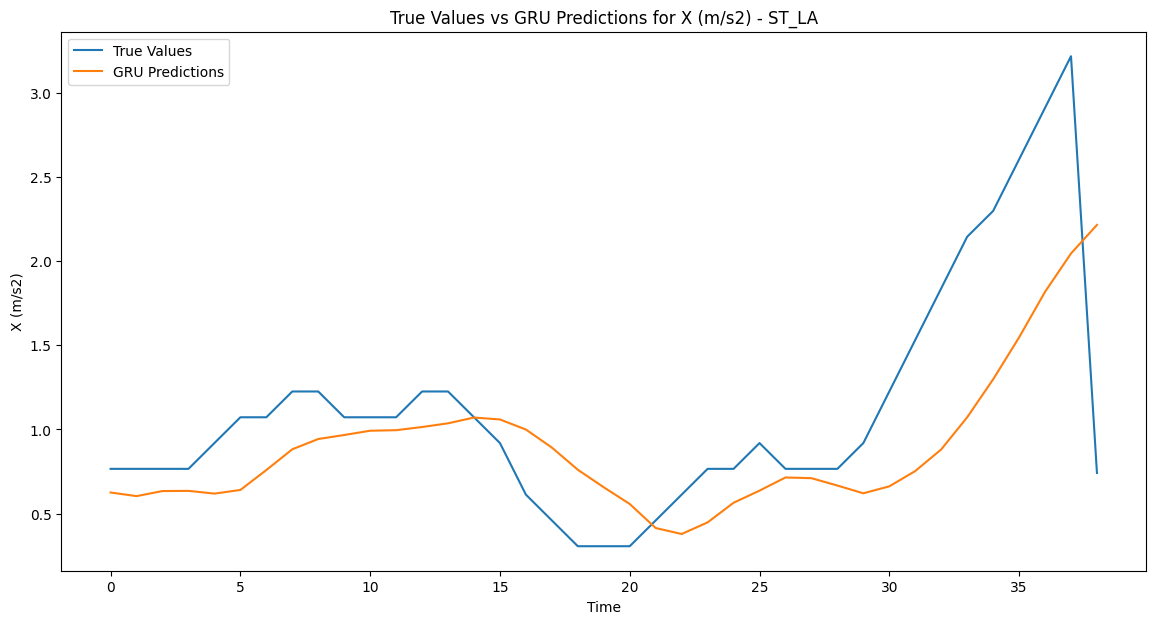

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
GRU for ST_LH - Mean Squared Error: 0.04056880445761476
GRU for ST_LH - Mean Absolute Error: 0.17210502146879073
(19, 10, 4)
(19, 4)
(19, 4)


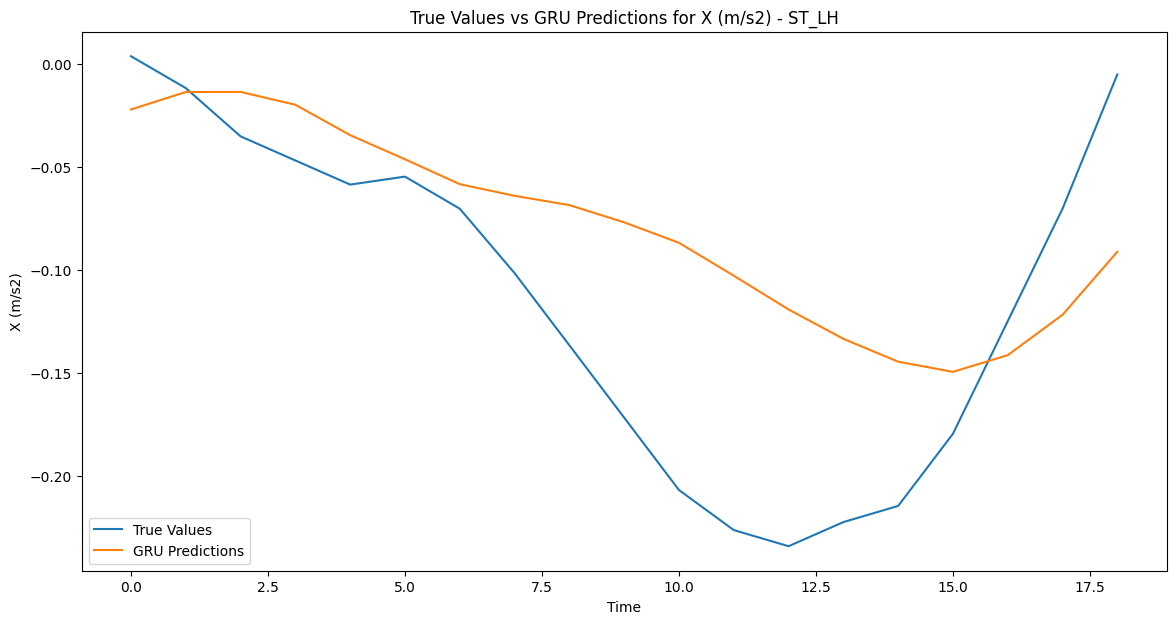

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
GRU for ST_LK - Mean Squared Error: 0.00717474384947088
GRU for ST_LK - Mean Absolute Error: 0.05461690795496014
(19, 10, 4)
(19, 4)
(19, 4)


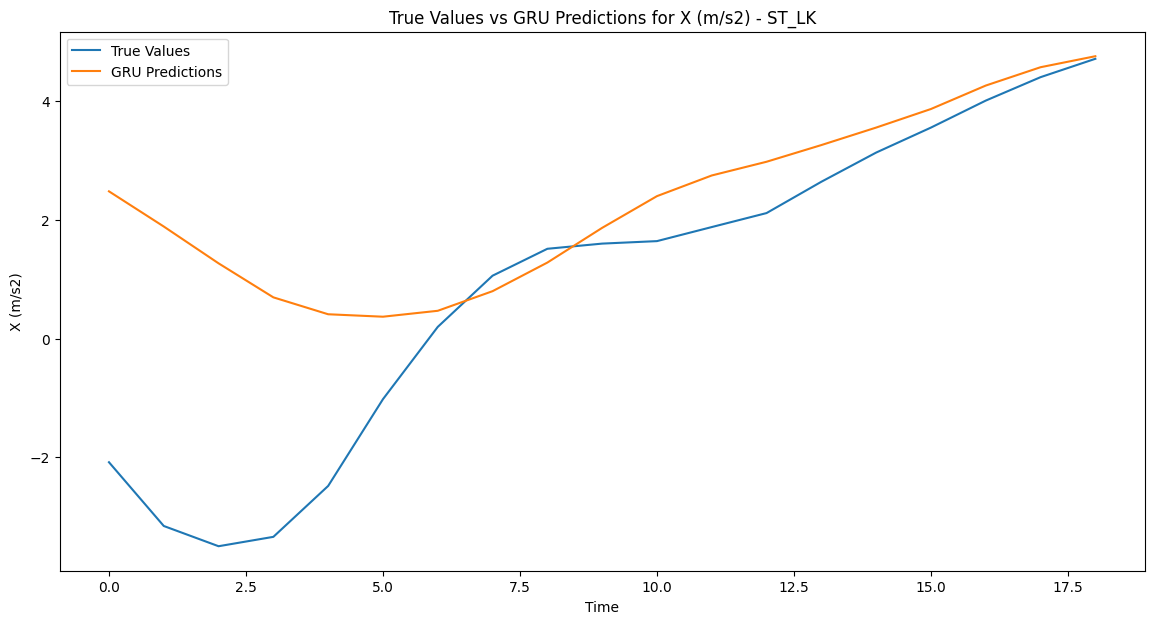

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
GRU for SW_LA - Mean Squared Error: 0.0021839610554180563
GRU for SW_LA - Mean Absolute Error: 0.038242837115175815
(39, 10, 4)
(39, 4)
(39, 4)


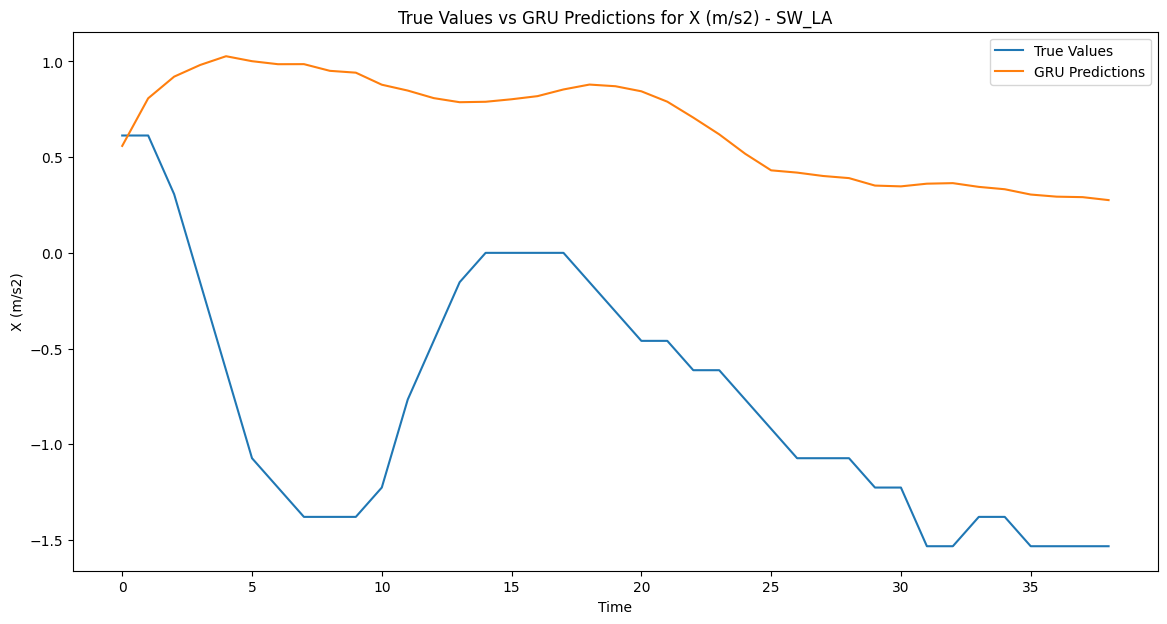

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
GRU for SW_LH - Mean Squared Error: 0.03244977996151242
GRU for SW_LH - Mean Absolute Error: 0.13894423141907453
(19, 10, 4)
(19, 4)
(19, 4)


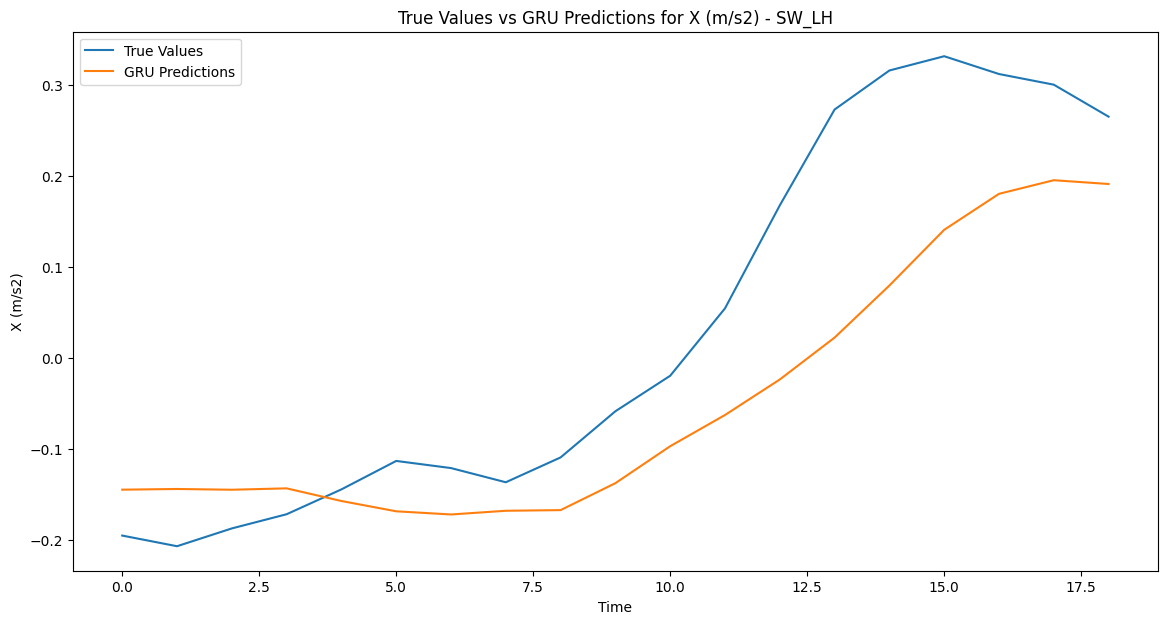

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
GRU for SW_LK - Mean Squared Error: 0.00536631807227708
GRU for SW_LK - Mean Absolute Error: 0.059807189603326115
(19, 10, 4)
(19, 4)
(19, 4)


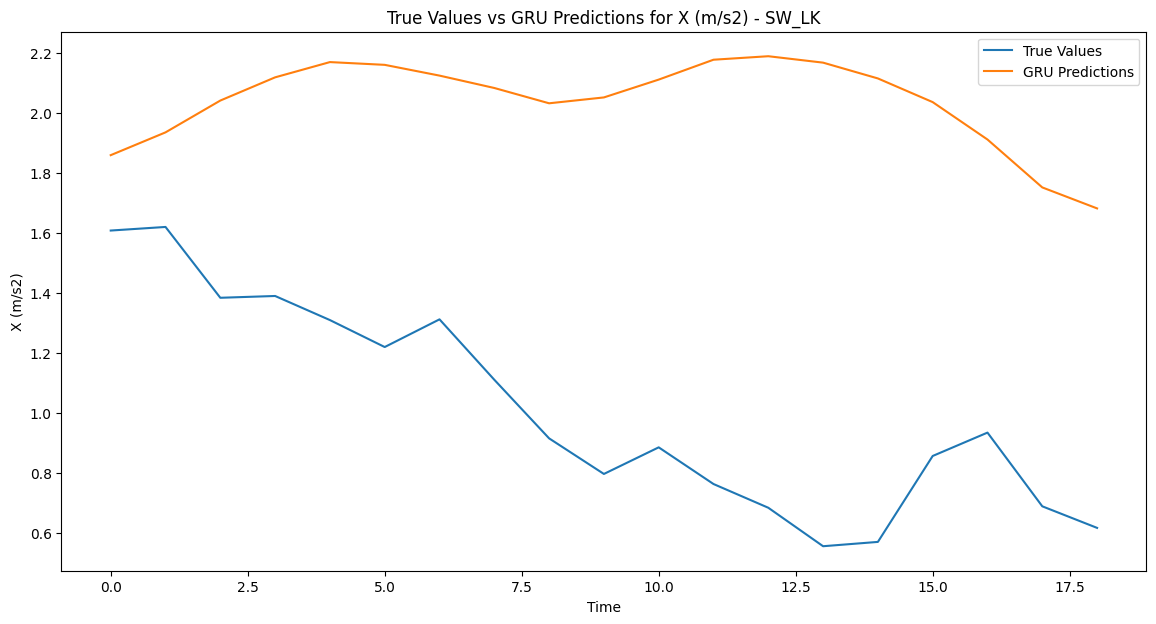

In [17]:

joint_data = {
    'ST_LA': (X_test_ST_LA, y_test_ST_LA, scaler_stance_LA),
    'ST_LH': (X_test_ST_LH, y_test_ST_LH, scaler_stance_LH),
    'ST_LK': (X_test_ST_LK, y_test_ST_LK, scaler_stance_LK),
    'SW_LA': (X_test_SW_LA, y_test_SW_LA, scaler_swing_LA),
    'SW_LH': (X_test_SW_LH, y_test_SW_LH, scaler_swing_LH),
    'SW_LK': (X_test_SW_LK, y_test_SW_LK, scaler_swing_LK)
}


for joint, (X_test, y_test, scaler) in joint_data.items():
    model = models[joint]
    

    if hasattr(scaler, 'min_'):

        predictions_inverse = evaluate_model(model, X_test, y_test, scaler, f'GRU for {joint}')
        

        y_test_inverse = scaler.inverse_transform(y_test)
        
        # Choose the feature index to plot (0 for X (m/s²))
        feature_index = 0
        
        # Plot true values vs predictions
        plot_predictions(y_test_inverse, predictions_inverse, feature_index, 'GRU', joint)
    else:
        print(f"Scaler for {joint} has not been fitted.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU for ST_LK - Mean Squared Error: 0.00717474384947088
GRU for ST_LK - Mean Absolute Error: 0.05461690795496014
(19, 10, 4)
(19, 4)
(19, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU for SW_LK - Mean Squared Error: 0.00536631807227708
GRU for SW_LK - Mean Absolute Error: 0.059807189603326115
(19, 10, 4)
(19, 4)
(19, 4)


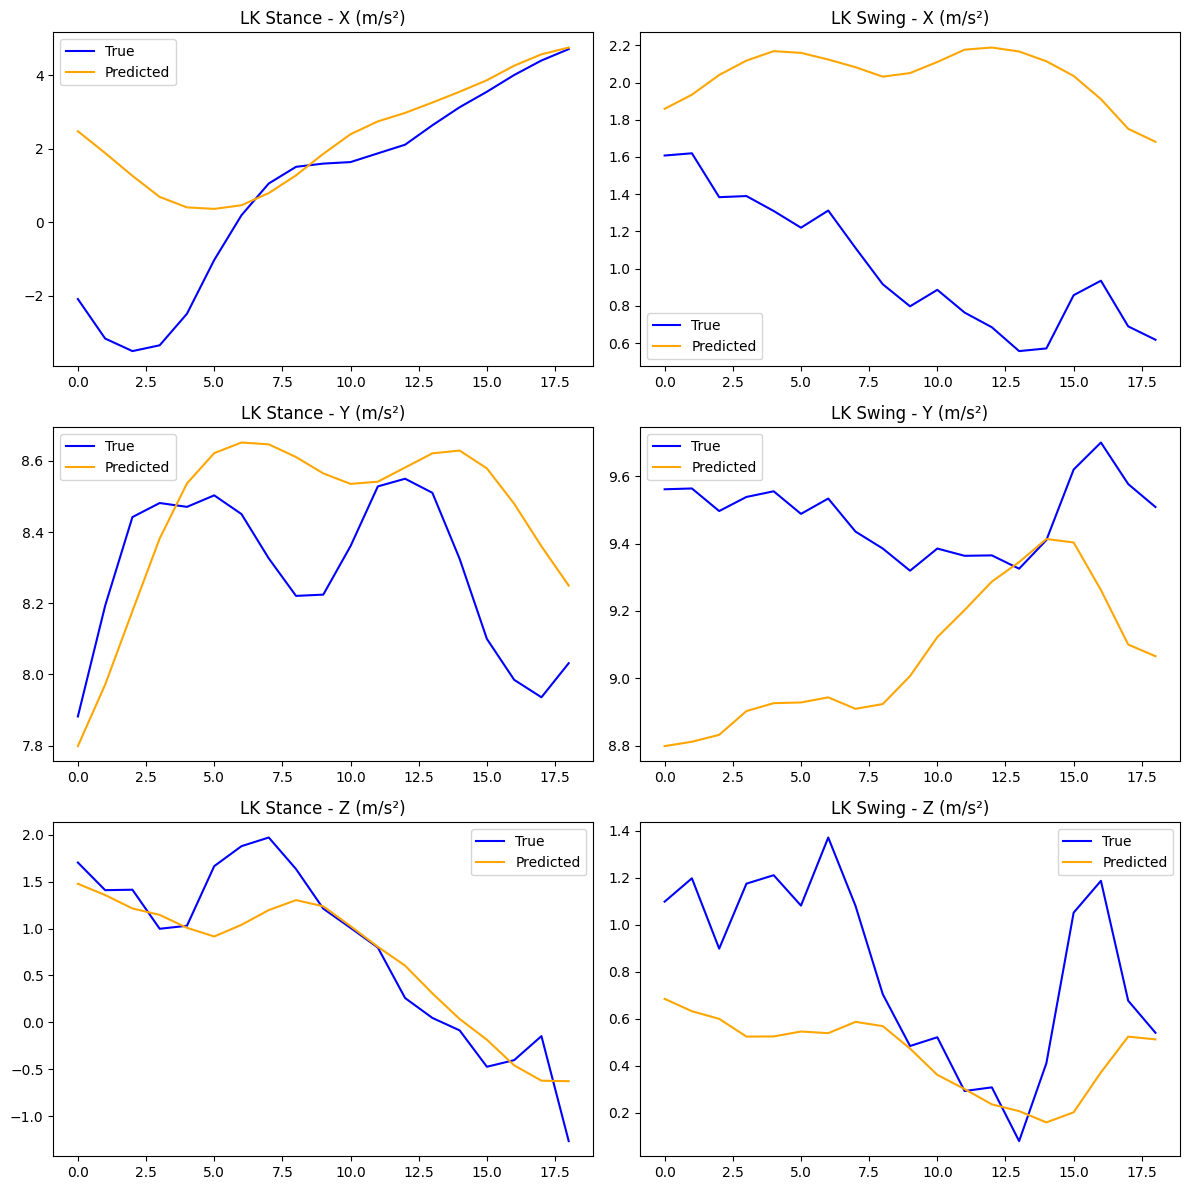

In [18]:
import matplotlib.pyplot as plt

def plot_joint_predictions(joint, y_test_inverse_stance, predictions_inverse_stance, y_test_inverse_swing, predictions_inverse_swing):

    fig, axes = plt.subplots(3, 2, figsize=(12, 12))


    axes_labels = ['X (m/s²)', 'Y (m/s²)', 'Z (m/s²)']
    
    for i in range(3):  # For X, Y, and Z axis

        axes[i, 0].plot(y_test_inverse_stance[:, i], label='True', color='blue')
        axes[i, 0].plot(predictions_inverse_stance[:, i], label='Predicted', color='orange')
        axes[i, 0].set_title(f'{joint} Stance - {axes_labels[i]}')
        axes[i, 0].legend()
        

        axes[i, 1].plot(y_test_inverse_swing[:, i], label='True', color='blue')
        axes[i, 1].plot(predictions_inverse_swing[:, i], label='Predicted', color='orange')
        axes[i, 1].set_title(f'{joint} Swing - {axes_labels[i]}')
        axes[i, 1].legend()


    plt.tight_layout()
    plt.show()


y_test_inverse_stance_LK = scaler_stance_LK.inverse_transform(y_test_ST_LK)
y_test_inverse_swing_LK = scaler_swing_LK.inverse_transform(y_test_SW_LK)

predictions_inverse_stance_LK = evaluate_model(models['ST_LK'], X_test_ST_LK, y_test_ST_LK, scaler_stance_LK, 'GRU for ST_LK')
predictions_inverse_swing_LK = evaluate_model(models['SW_LK'], X_test_SW_LK, y_test_SW_LK, scaler_swing_LK, 'GRU for SW_LK')


plot_joint_predictions('LK', y_test_inverse_stance_LK, predictions_inverse_stance_LK, y_test_inverse_swing_LK, predictions_inverse_swing_LK)




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
GRU for ST_LA - Mean Squared Error: 0.016317271552985537
GRU for ST_LA - Mean Absolute Error: 0.10384393920756117
(39, 10, 4)
(39, 4)
(39, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
GRU for SW_LA - Mean Squared Error: 0.0021839610554180563
GRU for SW_LA - Mean Absolute Error: 0.038242837115175815
(39, 10, 4)
(39, 4)
(39, 4)


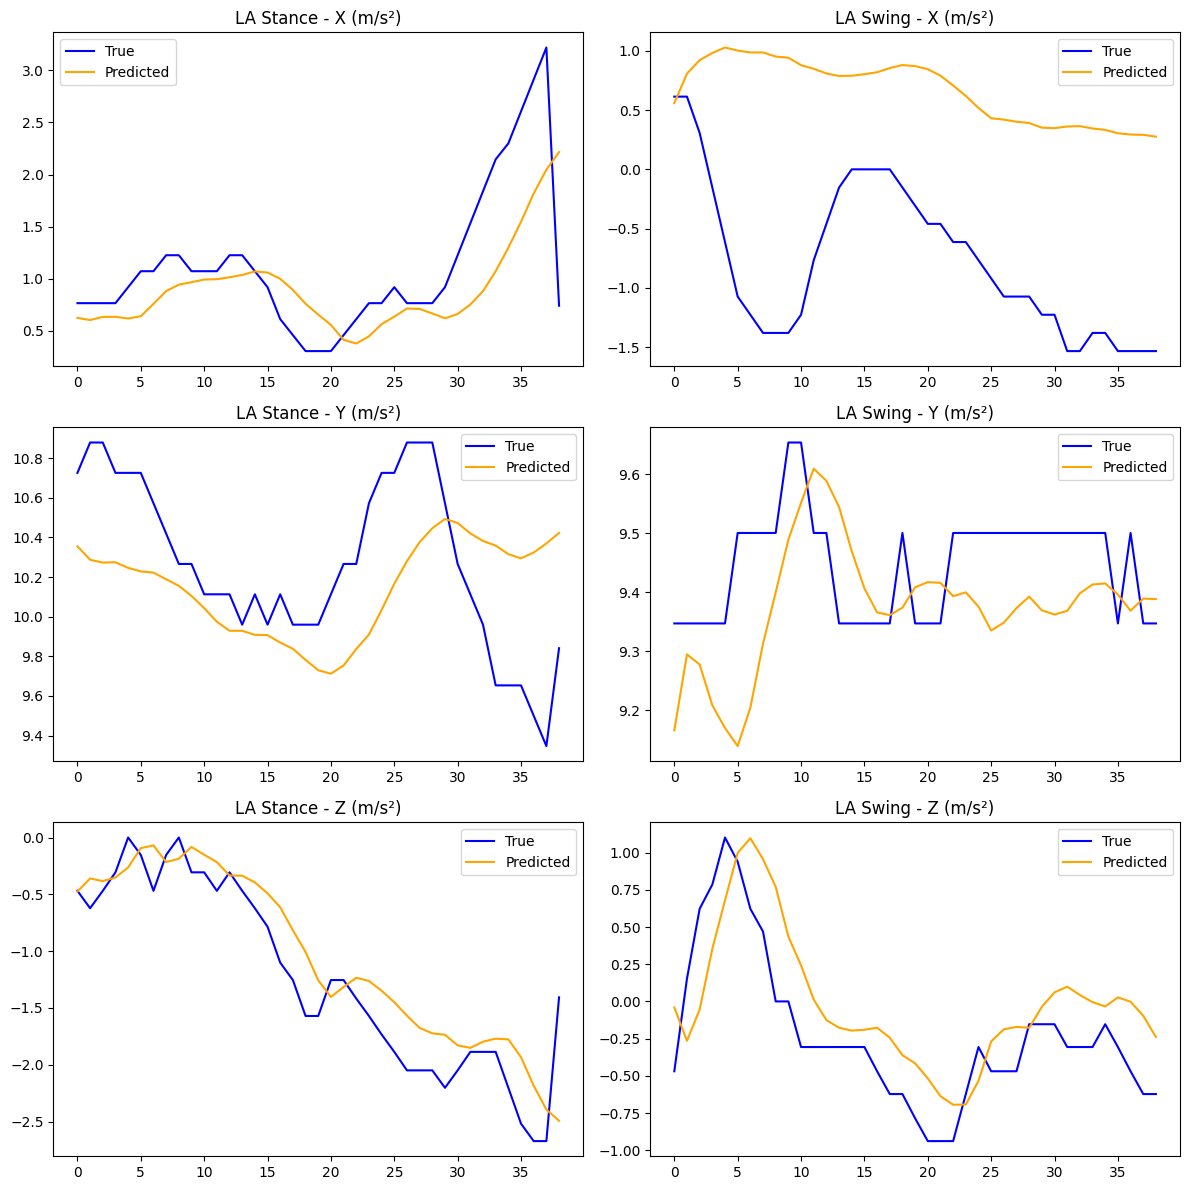

In [19]:

y_test_inverse_stance_LA = scaler_stance_LA.inverse_transform(y_test_ST_LA)
y_test_inverse_swing_LA = scaler_swing_LA.inverse_transform(y_test_SW_LA)

predictions_inverse_stance_LA = evaluate_model(models['ST_LA'], X_test_ST_LA, y_test_ST_LA, scaler_stance_LA, 'GRU for ST_LA')
predictions_inverse_swing_LA = evaluate_model(models['SW_LA'], X_test_SW_LA, y_test_SW_LA, scaler_swing_LA, 'GRU for SW_LA')


plot_joint_predictions('LA', y_test_inverse_stance_LA, predictions_inverse_stance_LA, y_test_inverse_swing_LA, predictions_inverse_swing_LA)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU for ST_LH - Mean Squared Error: 0.04056880445761476
GRU for ST_LH - Mean Absolute Error: 0.17210502146879073
(19, 10, 4)
(19, 4)
(19, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU for SW_LH - Mean Squared Error: 0.03244977996151242
GRU for SW_LH - Mean Absolute Error: 0.13894423141907453
(19, 10, 4)
(19, 4)
(19, 4)


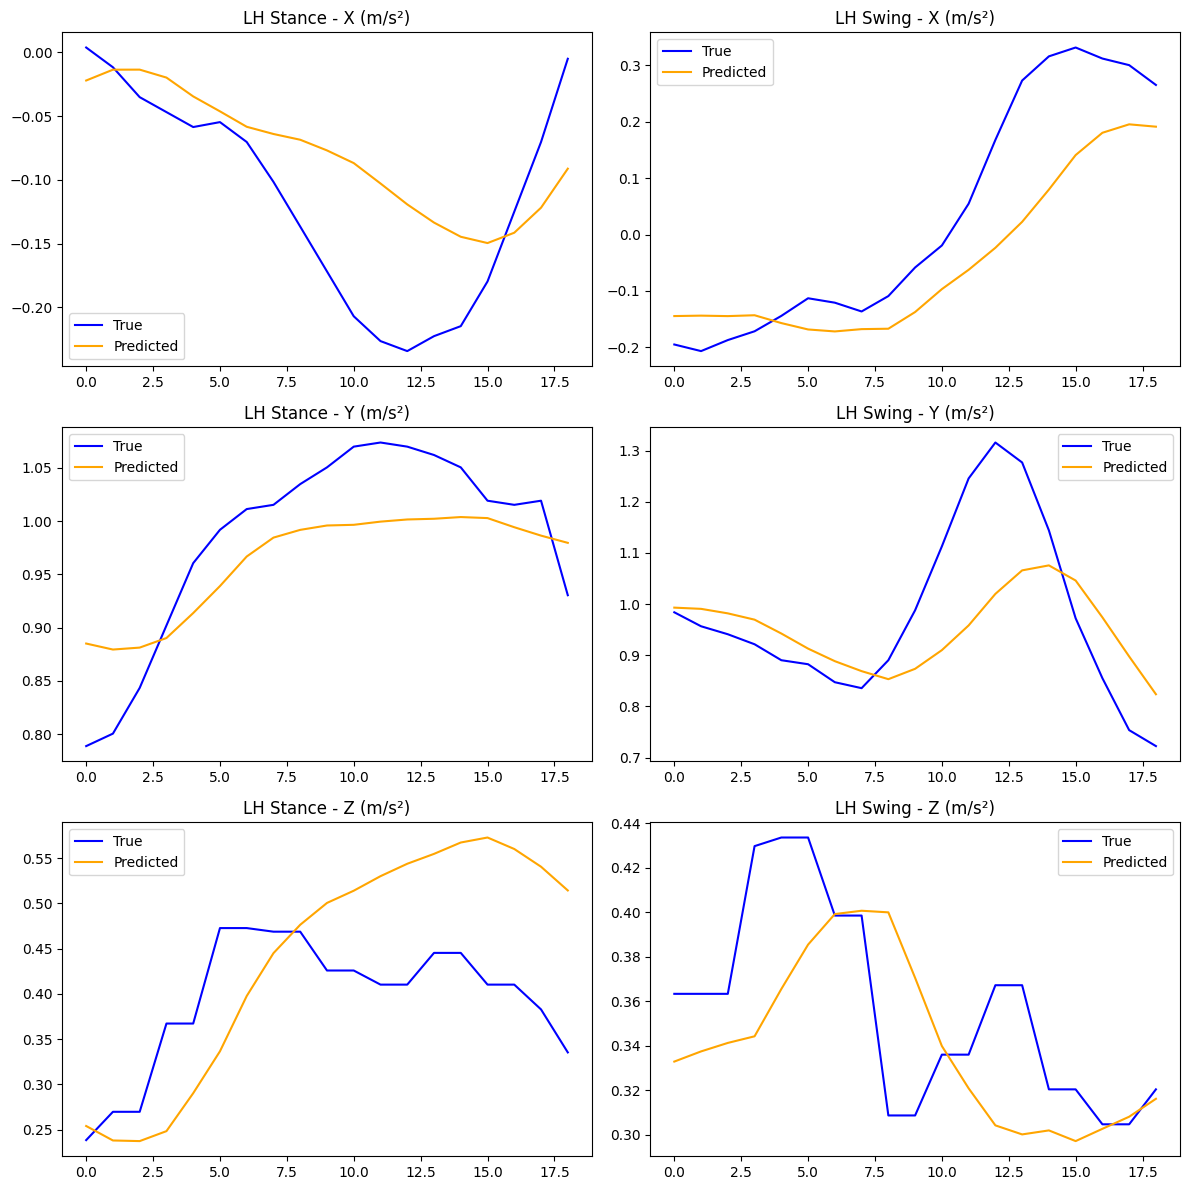

In [20]:

y_test_inverse_stance_LH = scaler_stance_LH.inverse_transform(y_test_ST_LH)
y_test_inverse_swing_LH = scaler_swing_LH.inverse_transform(y_test_SW_LH)

predictions_inverse_stance_LH = evaluate_model(models['ST_LH'], X_test_ST_LH, y_test_ST_LH, scaler_stance_LH, 'GRU for ST_LH')
predictions_inverse_swing_LH = evaluate_model(models['SW_LH'], X_test_SW_LH, y_test_SW_LH, scaler_swing_LH, 'GRU for SW_LH')


plot_joint_predictions('LH', y_test_inverse_stance_LH, predictions_inverse_stance_LH, y_test_inverse_swing_LH, predictions_inverse_swing_LH)
